In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Bilateral_Filter.jpg/540px-Bilateral_Filter.jpg -O example.jpg

--2024-11-10 18:02:00--  https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Bilateral_Filter.jpg/540px-Bilateral_Filter.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.58.240, 2a02:ec80:600:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.58.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56407 (55K) [image/jpeg]
Saving to: ‘example.jpg’

example.jpg         100%[===================>]  55,08K   204KB/s    in 0,3s    

2024-11-10 18:02:04 (204 KB/s) - ‘example.jpg’ saved [56407/56407]



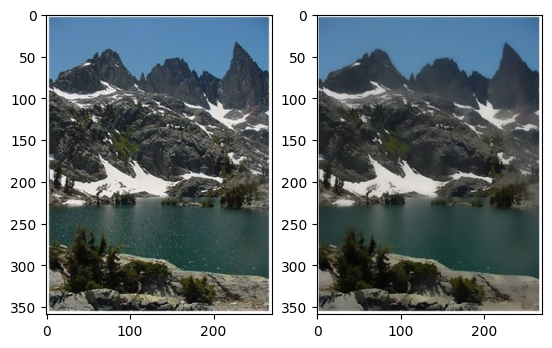

In [5]:
img = cv2.imread("example.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

source_img = img[:, :270, :]
filtered_img = img[:, 270:, :]

plt.subplot(121)
plt.imshow(source_img)
plt.subplot(122)
plt.imshow(filtered_img)

In [6]:
!rm -f example.jpg

In [24]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

def bilateral_filter(img, kernel_size, sigma_f, sigma_g):
    H, W, _ = img.shape
    output = np.zeros_like(img)
    
    for row in range(kernel_size // 2, H - kernel_size // 2):
        for col in range(kernel_size // 2, W - kernel_size // 2):
            normalization_term = 0
            smoothed_pixel = np.zeros_like(img[0, 0], dtype=np.float64)
            for k1 in range(-kernel_size // 2, kernel_size // 2 + 1):
                for k2 in range(-kernel_size // 2, kernel_size // 2 + 1):
                    smoothed_intensity = gaussian(
                        np.mean(img[row][col]) - np.mean(img[row + k1][col + k2]),
                        0,
                        sigma_f
                    )
                    smoothed_distance = gaussian(
                        np.sqrt(k1 ** 2 + k2 ** 2),
                        0,
                        sigma_g
                    )
                    w = smoothed_intensity * smoothed_distance
                    
                    # or alternatively
                    # w = np.exp(-(k1 ** 2 + k2 ** 2) / (2 * sigma_g ** 2)) \
                    #     * np.exp(-(np.linalg.norm(np.mean(img[row][col]) - np.mean(img[row + k1][col + k2])) ** 2) / (2 * sigma_f ** 2))
                    
                    normalization_term += w
                    smoothed_pixel += img[row + k1][col + k2] * w
            output[row][col] = smoothed_pixel / normalization_term
    
    return output    


In [29]:
result = bilateral_filter(source_img, 19, 10, 1.41)

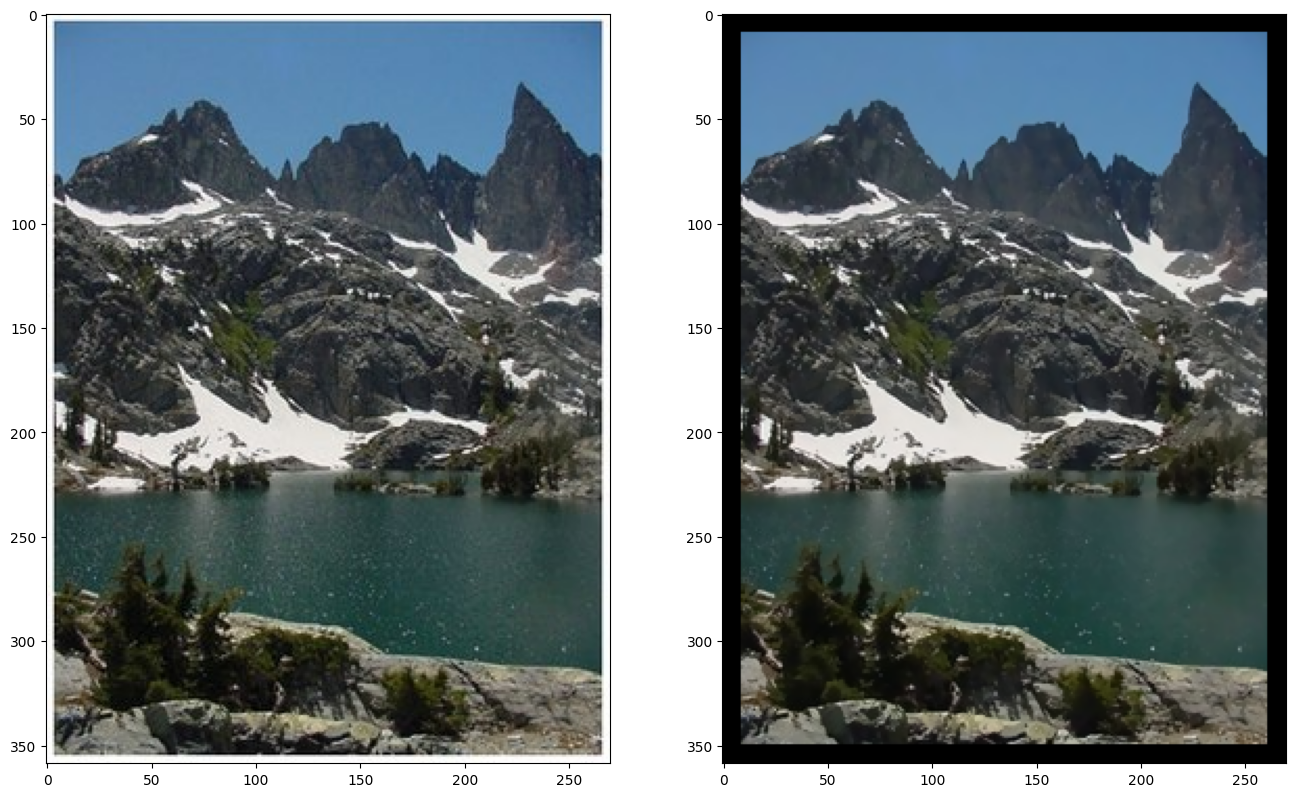

In [30]:
plt.figure(figsize=(16, 16))
plt.subplot(121)
plt.imshow(source_img)
plt.subplot(122)
plt.imshow(result)

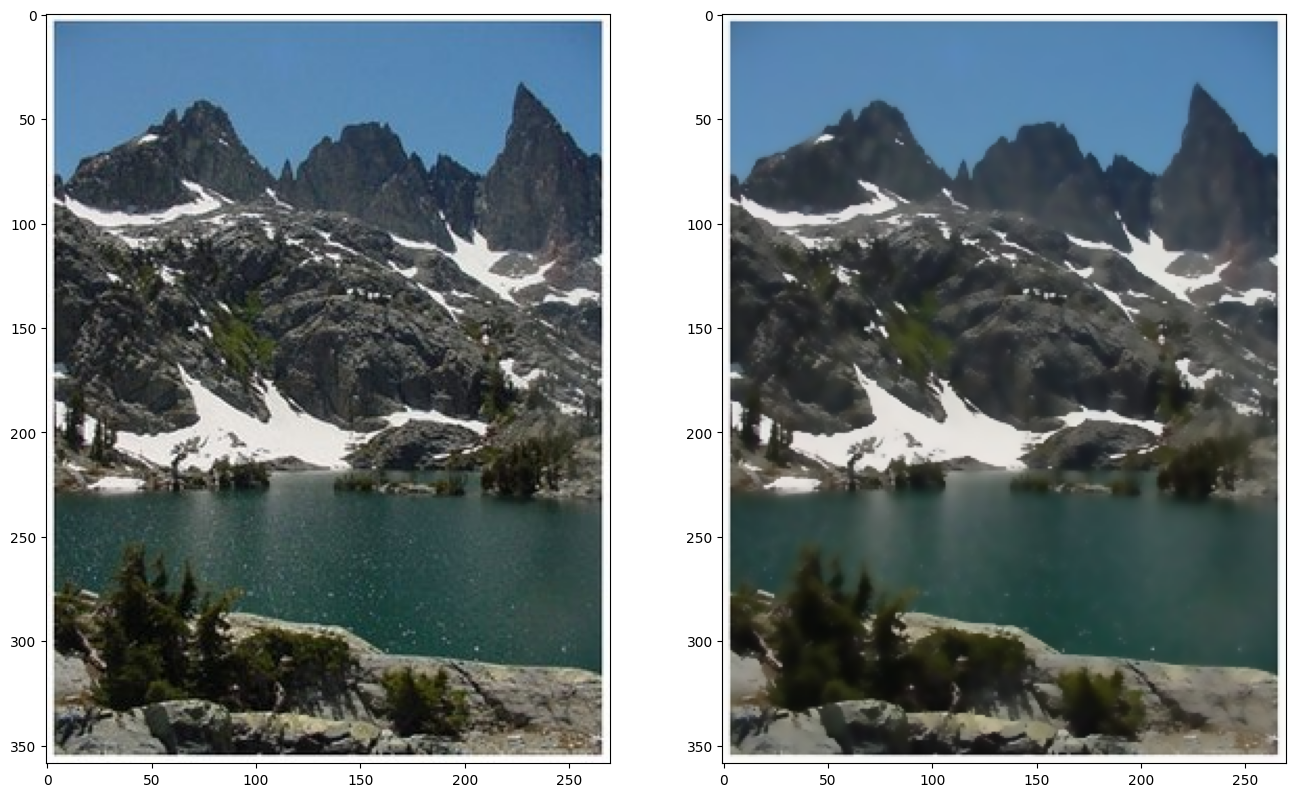

In [23]:
output = cv2.bilateralFilter(source_img, 9, 100, 2)
plt.figure(figsize=(16, 16))
plt.subplot(121)
plt.imshow(source_img)
plt.subplot(122)
plt.imshow(output)